In [39]:
# Import Libraries

import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import optuna
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# **PREPROCESSING**

In [41]:
print(train.shape, test.shape)
print(train.head())

(11688, 15) (3400, 14)
                     ID        date cluster_id  electricity_consumption  \
0  cluster_1_2014-01-01  2014-01-01  cluster_1                  358.032   
1  cluster_2_2014-01-01  2014-01-01  cluster_2                  548.247   
2  cluster_3_2014-01-01  2014-01-01  cluster_3                  758.303   
3  cluster_4_2014-01-01  2014-01-01  cluster_4                 1072.077   
4  cluster_1_2014-01-02  2014-01-02  cluster_1                  386.908   

   temperature_2m_max  temperature_2m_min  apparent_temperature_max  \
0                10.8                 4.2                       5.5   
1                12.2                 4.3                       8.6   
2                12.9                -0.8                      10.1   
3                10.8                 4.7                       6.7   
4                10.7                 7.0                       6.6   

   apparent_temperature_min  sunshine_duration  daylight_duration  \
0                       0.4   

In [42]:
train.describe()

,electricity_consumption,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,sunshine_duration,daylight_duration,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration
count,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000
mean,642.313328,18.733385,7.174786,17.215315,4.784608,29302.656241,44070.779592,23.273058,46.420115,202.335554,12.742257,2.428585
std,287.673473,7.504161,5.960263,9.085303,7.260336,13600.113712,9283.839471,7.993389,15.226372,100.697741,7.588077,1.607845
min,207.472000,-1.900000,-10.800000,-8.100000,-15.400000,0.000000,29447.550000,6.800000,13.300000,0.002855,0.333333,0.173333
25%,414.376000,12.800000,2.500000,10.000000,-1.100000,19104.170833,35150.501667,17.400000,35.300000,134.384708,5.600000,0.990000
50%,602.672000,18.200000,7.100000,16.400000,4.400000,29917.360000,44185.056667,22.000000,43.900000,219.000000,12.140000,2.156667
75%,836.034500,24.300000,12.100000,24.000000,10.800000,40697.756667,52997.815833,28.000000,54.700000,281.609519,18.924167,3.616667
max,1658.348000,40.900000,23.200000,42.600000,23.800000,53498.910000,58501.420000,63.900000,126.700000,360.000000,29.983333,8.133333


In [43]:
test.describe()

,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,sunshine_duration,daylight_duration,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration
count,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000
mean,18.961500,7.129000,17.426235,4.659794,28386.893019,43536.462394,24.544941,46.368529,200.037026,12.845216,2.462490
std,7.943236,6.081648,9.560501,7.360106,14102.638216,9048.358998,8.200494,14.683887,99.141482,7.786489,1.682623
min,-0.500000,-9.900000,-5.200000,-13.900000,0.000000,29445.496667,8.400000,14.800000,0.031158,0.636667,0.170000
25%,12.900000,2.700000,9.800000,-0.800000,17353.708333,34971.655833,18.600000,36.000000,134.318827,5.615833,0.985833
50%,17.800000,7.000000,16.000000,4.100000,28889.441667,43325.776667,23.200000,43.900000,213.308826,12.131667,2.076667
75%,25.225000,12.200000,25.300000,10.825000,40171.849167,51761.820000,29.600000,55.100000,274.307947,19.294167,3.633333
max,41.000000,20.700000,42.900000,22.200000,53326.583333,58498.340000,69.900000,119.500000,359.641099,29.530000,8.463333


In [44]:
tr_null = train.isnull().sum()
ts_null = test.isnull().sum()

print(tr_null)
print(ts_null)

ID                             0
date                           0
cluster_id                     0
electricity_consumption        0
temperature_2m_max             0
temperature_2m_min             0
apparent_temperature_max       0
apparent_temperature_min       0
sunshine_duration              0
daylight_duration              0
wind_speed_10m_max             0
wind_gusts_10m_max             0
wind_direction_10m_dominant    0
shortwave_radiation_sum        0
et0_fao_evapotranspiration     0
dtype: int64
ID                             0
date                           0
cluster_id                     0
temperature_2m_max             0
temperature_2m_min             0
apparent_temperature_max       0
apparent_temperature_min       0
sunshine_duration              0
daylight_duration              0
wind_speed_10m_max             0
wind_gusts_10m_max             0
wind_direction_10m_dominant    0
shortwave_radiation_sum        0
et0_fao_evapotranspiration     0
dtype: int64


In [45]:
assert train['ID'].is_unique, "ID train tidak unik!"
assert test['ID'].is_unique, "ID test tidak unik!"

In [46]:
print(train['cluster_id'].unique())

['cluster_1' 'cluster_2' 'cluster_3' 'cluster_4']


In [47]:
from sklearn.preprocessing import LabelEncoder

# kalau untuk CatBoost
le = LabelEncoder()
train['cluster_id_le'] = le.fit_transform(train['cluster_id'])
test['cluster_id_le'] = le.transform(test['cluster_id'])

# kalau untuk LGBM/XGB
train_onehot = pd.get_dummies(train, columns=['cluster_id'])
test_onehot = pd.get_dummies(test, columns=['cluster_id'])

In [48]:
train['month'] = pd.to_datetime(train['date']).dt.month
train['day'] = pd.to_datetime(train['date']).dt.day
test['month'] = pd.to_datetime(test['date']).dt.month
test['day'] = pd.to_datetime(test['date']).dt.day
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])

In [49]:
train['year'] = train['date'].dt.year
test['year'] = test['date'].dt.year

print("Distribusi tahun train:")
print(train['year'].value_counts())

print("Distribusi tahun test:")
print(test['year'].value_counts())

# cek month
print("Distribusi bulan train:")
print(train['month'].value_counts().sort_index())

print("Distribusi bulan test:")
print(test['month'].value_counts().sort_index())

Distribusi tahun train:
year
2016    1464
2020    1464
2015    1460
2014    1460
2017    1460
2018    1460
2019    1460
2021    1460
Name: count, dtype: int64
Distribusi tahun test:
year
2022    1460
2023    1460
2024     480
Name: count, dtype: int64
Distribusi bulan train:
month
1     992
2     904
3     992
4     960
5     992
6     960
7     992
8     992
9     960
10    992
11    960
12    992
Name: count, dtype: int64
Distribusi bulan test:
month
1     372
2     340
3     372
4     356
5     248
6     240
7     248
8     248
9     240
10    248
11    240
12    248
Name: count, dtype: int64


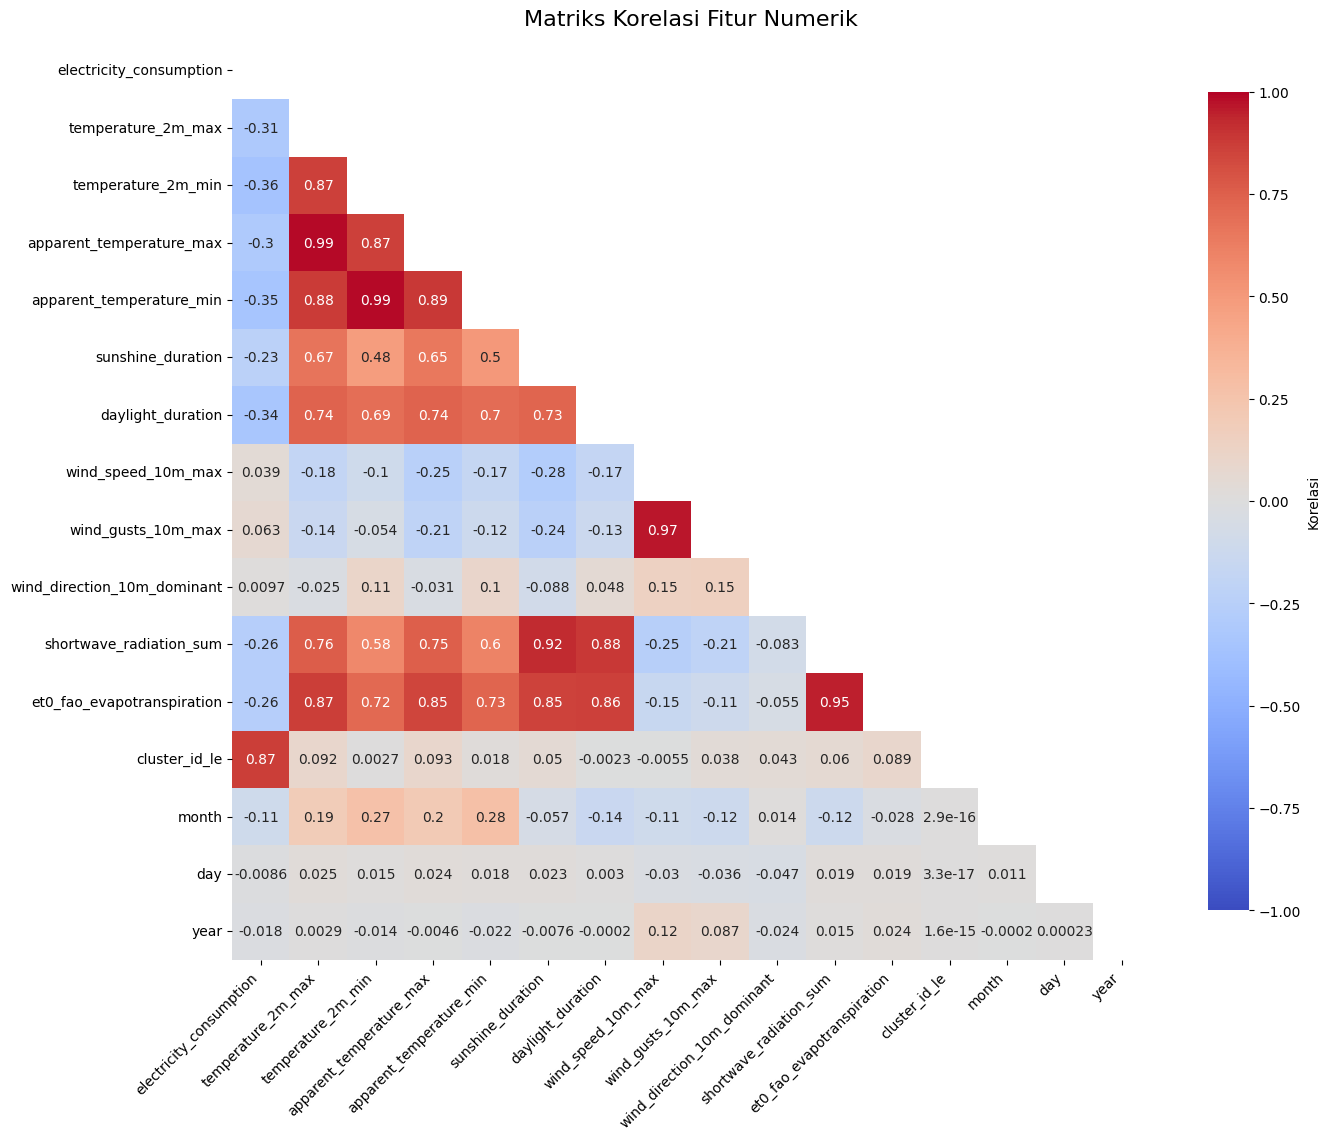

In [ ]:
# Correlation Heatmap
corr = train.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(14,12))
sns.heatmap(
    corr, mask=mask,
    annot=True, fmt='.2g',
    cmap='coolwarm', center=0,
    square=True,
    vmin=-1, vmax=1,
    cbar_kws={'shrink':0.8, 'label':'Korelasi'}
)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title('Matriks Korelasi Fitur Numerik', fontsize=16, pad=12)
plt.tight_layout()
plt.show()

In [ ]:
for df in [train, test]:
    df['temp_range'] = df['temperature_2m_max'] - df['temperature_2m_min']
    df['apparent_temp_range'] = df['apparent_temperature_max'] - df['apparent_temperature_min']
    df['is_weekend'] = df['date'].dt.dayofweek.isin([5,6]).astype(int)

In [ ]:
print(train[train['wind_gusts_10m_max'] > 70])

threshold = train['wind_gusts_10m_max'].quantile(0.995)
for df in [train, test]:
    df['wind_gusts_10m_max'] = df['wind_gusts_10m_max'].clip(upper=threshold)

                         ID       date cluster_id  electricity_consumption  \
0      cluster_1_2014-01-01 2014-01-01  cluster_1                  358.032   
1      cluster_2_2014-01-01 2014-01-01  cluster_2                  548.247   
3      cluster_4_2014-01-01 2014-01-01  cluster_4                 1072.077   
4      cluster_1_2014-01-02 2014-01-02  cluster_1                  386.908   
5      cluster_2_2014-01-02 2014-01-02  cluster_2                  567.775   
...                     ...        ...        ...                      ...   
11606  cluster_3_2021-12-11 2021-12-11  cluster_3                  876.749   
11672  cluster_1_2021-12-28 2021-12-28  cluster_1                  387.921   
11673  cluster_2_2021-12-28 2021-12-28  cluster_2                  539.470   
11674  cluster_3_2021-12-28 2021-12-28  cluster_3                  759.065   
11678  cluster_3_2021-12-29 2021-12-29  cluster_3                  723.998   

       temperature_2m_max  temperature_2m_min  apparent_tempera

In [ ]:
tr_desc = train.describe()
ts_desc = test.describe()

print(tr_desc)
print(ts_desc)

                      date  electricity_consumption  temperature_2m_max  \
count                11688             11688.000000        11688.000000   
mean   2017-12-31 12:00:00               642.313328           18.733385   
min    2014-01-01 00:00:00               207.472000           -1.900000   
25%    2016-01-01 00:00:00               414.376000           12.800000   
50%    2017-12-31 12:00:00               602.672000           18.200000   
75%    2020-01-01 00:00:00               836.034500           24.300000   
max    2021-12-31 00:00:00              1658.348000           40.900000   
std                    NaN               287.673473            7.504161   

       temperature_2m_min  apparent_temperature_max  apparent_temperature_min  \
count        11688.000000              11688.000000              11688.000000   
mean             7.174786                 17.215315                  4.784608   
min            -10.800000                 -8.100000                -15.400000   


In [ ]:
train['cluster_id'] = train['cluster_id'].astype(str)

# Ganti ini kalau nama kolom berbeda:
temp_col = 'temperature_2m_min'
sun_col = 'sunshine_duration'

# Filter kondisi
q1_temp = train[temp_col].quantile(0.25)
mean_sun = train[sun_col].mean()

filtered = train[
    (train[temp_col] < q1_temp) &
    (train[sun_col] < mean_sun)
]

avg_by_cluster = (
    filtered.groupby('cluster_id')['electricity_consumption']
            .mean()
            .reset_index()
            .rename(columns={'electricity_consumption': 'avg_consumption'})
)
print(avg_by_cluster)

  cluster_id  avg_consumption
0  cluster_1       446.717842
1  cluster_2       656.699589
2  cluster_3       887.137849
3  cluster_4      1290.826150


In [ ]:
# Outlier bulanan
monthly = train.groupby(['cluster_id', 'month'])['electricity_consumption'] \
               .mean().reset_index()

# Tentukan IQR dan batas outlier
Q1 = monthly['electricity_consumption'].quantile(0.25)
Q3 = monthly['electricity_consumption'].quantile(0.75)
IQR = Q3 - Q1
lb, ub = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

# Ambil outlier
monthly_outliers = monthly[
    (monthly['electricity_consumption'] < lb) |
    (monthly['electricity_consumption'] > ub)
].copy()

In [ ]:
# Outlier harian
daily = train.groupby(['cluster_id', 'day'])['electricity_consumption'] \
             .mean().reset_index()

Q1d = daily['electricity_consumption'].quantile(0.25)
Q3d = daily['electricity_consumption'].quantile(0.75)
IQRd = Q3d - Q1d
lbd, ubd = Q1d - 1.5 * IQRd, Q3d + 1.5 * IQRd

daily_outliers = daily[
    (daily['electricity_consumption'] < lbd) |
    (daily['electricity_consumption'] > ubd)
].copy()

In [ ]:
print("Outlier Bulanan:")
print(monthly_outliers)
print("Min monthly: ", monthly['electricity_consumption'].min(),"Max monthly: " ,  monthly['electricity_consumption'].max())
print("Batas bawah: ", lb, "Batas atas:", ub)

print("Outlier Harian:")
print(daily_outliers)
print("Min daily:", daily['electricity_consumption'].min(), "Max daily: ", daily['electricity_consumption'].max())
print("Batas bawah: ", lbd, "Batas atas:", ubd)

Outlier Bulanan:
Empty DataFrame
Columns: [cluster_id, month, electricity_consumption]
Index: []
Min monthly:  259.4276411290323 Max monthly:  1312.011314516129
Batas bawah:  -229.22390887096782 Batas atas: 1499.2384018817206
Outlier Harian:
Empty DataFrame
Columns: [cluster_id, day, electricity_consumption]
Index: []
Min daily: 332.1109479166667 Max daily:  1034.1718125
Batas bawah:  -38.79339508928575 Batas atas: 1281.149720982143


In [ ]:
# # Exploratory Data Analysis
# import matplotlib.pyplot as plt
# import seaborn as sns

# for column in train.columns:
#     plt.figure(figsize=(8, 6))
#     sns.histplot(train[column], kde=True)
#     plt.title(f'Histogram of {column}')
#     plt.xlabel(column)
#     plt.ylabel('Frequency')
#     plt.show()

# for column in train.columns:
#     plt.figure(figsize=(8, 6))
#     sns.boxplot(train[column])
#     plt.title(f'Boxplot of {column}')
#     plt.xlabel(column)
#     plt.ylabel('Frequency')
#     plt.show()

# **LIGHTGBM**

In [18]:
# %pip install lightgbm
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# fitur
features = [col for col in train_onehot.columns if col not in ['ID', 'date', 'electricity_consumption', 'cluster_id']]

X = train_onehot[features]
y = train_onehot['electricity_consumption']
X_test = test_onehot[features]

# split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# model
model = lgb.LGBMRegressor(
    random_state=42,
    learning_rate=0.05,
    n_estimators=1000,
    subsample = 0.8,
    colsample_bytree = 0.8,
    reg_alpha=1.0,
    reg_lambda=1.0,
    boosting_type='gbdt'
)

model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric="rmse",
    callbacks=[lgb.early_stopping(stopping_rounds=20, verbose=True)]
)

# validation
lgbm_val_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, lgbm_val_pred))
print(f'Validation RMSE (LGBM): {rmse:.4f}')

# predict on test
lgbm_test_pred = model.predict(X_test)

# save submission
submission = pd.DataFrame({
    'ID': test_onehot['ID'],
    'electricity_consumption': lgbm_test_pred
})
submission.to_csv('submission_lgbm.csv', index=False)

print("submission_lgbm.csv saved.")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000549 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2787
[LightGBM] [Info] Number of data points in the train set: 9350, number of used features: 16
[LightGBM] [Info] Start training from score 641.053793
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[242]	valid_0's rmse: 50.063	valid_0's l2: 2506.3
Validation RMSE (LGBM): 50.0630
submission_lgbm.csv saved.


# **CATBOOST**

In [21]:
#%pip install catboost (install dlu klo belum)

from catboost import CatBoostRegressor, Pool, cv
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# --- pastikan cluster_id di category (sudah di train/test hasil preprocessing) ---
train['cluster_id'] = train['cluster_id'].astype('category')
test['cluster_id'] = test['cluster_id'].astype('category')

# --- gunakan fitur dari pipeline feature engineering sebelumnya ---
features = [
    col for col in train.columns
    if col not in ['ID', 'date', 'electricity_consumption']
]

# --- train-val split ---
X_train, X_val, y_train, y_val = train_test_split(
    train[features],
    train['electricity_consumption'],
    test_size=0.3,
    random_state=42
)

# --- catboost ---
pool = Pool(train[features], train['electricity_consumption'], cat_features=['cluster_id'])

params = {
    'loss_function': 'RMSE',
    'bootstrap_type': 'Bayesian',
    'bagging_temperature': 2.0,
    'random_strength': 3.0,
    'grow_policy': 'Lossguide',
    'max_leaves': 61,
    'l2_leaf_reg': 5,
    'min_data_in_leaf': 60,
    'learning_rate': 0.03,
    
}


# --- evaluation ---
cv_data = cv(
    params=params,
    pool=pool,
    fold_count=5,
    early_stopping_rounds=200,
    logging_level='Silent'
)

best_rmse = cv_data['test-RMSE-mean'].min()
best_iter = cv_data['iterations'][cv_data['test-RMSE-mean'].argmin()]
print("CV RMSE:", best_rmse, "at iter", best_iter)

model_cb = CatBoostRegressor(
    **params,
    iterations=best_iter,
    early_stopping_rounds=100,
    use_best_model=True,
    random_seed=42,
    verbose=200
)

model_cb.fit(
    pd.concat([X_train, X_val]),
    pd.concat([y_train, y_val]),
    cat_features=['cluster_id'],
    eval_set=(X_val, y_val),
    early_stopping_rounds=100,
    verbose=200
)

cb_val_pred = model_cb.predict(X_val)
print("Final Val RMSE:", np.sqrt(mean_squared_error(y_val, cb_val_pred)))



# --- predict test ---
cb_test_pred = model_cb.predict(test[features])

submission = pd.DataFrame({
    'ID': test['ID'],
    'electricity_consumption': cb_test_pred
})
submission.to_csv('submission_catboost4.csv', index=False)
print("submission_catboost4.csv saved.")



CV RMSE: 26.91815206627681 at iter 999
0:	learn: 279.7862283	test: 281.1072808	best: 281.1072808 (0)	total: 139ms	remaining: 2m 18s
200:	learn: 31.3256855	test: 30.5882647	best: 30.5882647 (200)	total: 23.8s	remaining: 1m 34s
400:	learn: 26.5711531	test: 25.6223740	best: 25.6223740 (400)	total: 41.7s	remaining: 1m 2s
600:	learn: 24.5026758	test: 23.5754070	best: 23.5754070 (600)	total: 59.6s	remaining: 39.5s
800:	learn: 23.1230507	test: 22.2796104	best: 22.2796104 (800)	total: 1m 17s	remaining: 19.1s
998:	learn: 22.1101151	test: 21.3753594	best: 21.3753594 (998)	total: 1m 34s	remaining: 0us

bestTest = 21.37535941
bestIteration = 998

Final Val RMSE: 21.375359327800673
submission_catboost4.csv saved.


Before: 24.0617
After:

# **XGBoost**

In [19]:
# %pip install xgboost

In [ ]:
print(set(test['cluster_id']) - set(train['cluster_id']))

set()


: 

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# --- Feature Engineering konsisten ---
train['temp_range'] = train['temperature_2m_max'] - train['temperature_2m_min']
test['temp_range'] = test['temperature_2m_max'] - test['temperature_2m_min']

train['apparent_temp_range'] = train['apparent_temperature_max'] - train['apparent_temperature_min']
test['apparent_temp_range'] = test['apparent_temperature_max'] - test['apparent_temperature_min']

train['is_weekend'] = pd.to_datetime(train['date']).dt.dayofweek >= 5
test['is_weekend'] = pd.to_datetime(test['date']).dt.dayofweek >= 5
train['is_weekend'] = train['is_weekend'].astype(int)
test['is_weekend'] = test['is_weekend'].astype(int)

# pastikan cluster_id kategori
train['cluster_id'] = train['cluster_id'].astype('category')
test['cluster_id'] = test['cluster_id'].astype('category')

# --- handle missing ---
train.fillna(train.median(numeric_only=True), inplace=True)
test.fillna(test.median(numeric_only=True), inplace=True)

# --- handle outlier ---
for col in [
    'temperature_2m_max', 'temperature_2m_min', 'apparent_temperature_max',
    'apparent_temperature_min', 'sunshine_duration', 'daylight_duration',
    'wind_speed_10m_max', 'wind_gusts_10m_max', 'shortwave_radiation_sum',
    'et0_fao_evapotranspiration'
]:
    q_low = train[col].quantile(0.01)
    q_high = train[col].quantile(0.99)
    train[col] = train[col].clip(lower=q_low, upper=q_high)
    test[col] = test[col].clip(lower=q_low, upper=q_high)

# --- feature selection ---
features = [
    col for col in train.columns
    if col not in ['ID', 'date', 'electricity_consumption']
]

# --- split ---
X_train, X_val, y_train, y_val = train_test_split(
    train[features], train['electricity_consumption'],
    test_size=0.2, random_state=42
)

# --- DMatrix dengan enable_categorical ---
dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dval = xgb.DMatrix(X_val, label=y_val, enable_categorical=True)
dtest = xgb.DMatrix(test[features], enable_categorical=True)

# --- param ---
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'learning_rate': 0.05,
    'max_depth': 6,
    'subsample': 0.8,
    'reg_alpha': 0.1,
    'reg_lambda': 1.0,
    'colsample_bytree': 0.8,
    'seed': 42
}

# --- train ---
evallist = [(dtrain, 'train'), (dval, 'eval')]

model = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=evallist,
    early_stopping_rounds=50,
    verbose_eval=100
)

# --- validation ---
xgb_val_pred = model.predict(dval)
rmse = np.sqrt(mean_squared_error(y_val, xgb_val_pred))
print(f'Validation RMSE: {rmse:.4f}')

# --- feature importance ---
xgb.plot_importance(model, max_num_features=20)
plt.show()

# --- predict test ---
xgb_test_pred = model.predict(dtest)

submission = pd.DataFrame({
    'ID': test['ID'],
    'electricity_consumption': xgb_test_pred
})
submission.to_csv('submission_xgb.csv', index=False)
print("submission_xgb.csv saved.")


NameError: name 'train' is not defined

Before: 24.8836
After: 24.7741

# **ENSEMBLE: LGBM + CATBOOST + XGBOOST**

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# ensemble di validation
ensemble_val_avg = (lgbm_val_pred + cb_val_pred + xgb_val_pred) / 3
rmse_avg = np.sqrt(mean_squared_error(y_val, ensemble_val_avg))
print(f'Validation RMSE (Ensemble Average): {rmse_avg:.4f}')

# weighted ensemble di validation
ensemble_val_weighted = (
    0.2 * lgbm_val_pred +
    0.2 * xgb_val_pred +
    0.6 * cb_val_pred
)
rmse_weighted = np.sqrt(mean_squared_error(y_val, ensemble_val_weighted))
print(f'Validation RMSE (Ensemble Weighted): {rmse_weighted:.4f}')

# ensemble di test
ensemble_test_avg = (lgbm_test_pred + cb_test_pred + xgb_test_pred) / 3
ensemble_test_weighted = (
    0.2 * lgbm_test_pred +
    0.2 * xgb_test_pred +
    0.6 * cb_test_pred
)

# save ke submission
submission_avg = pd.DataFrame({
    'ID': test['ID'],
    'electricity_consumption': ensemble_test_avg
})
submission_avg.to_csv('submission_ensemble_avg.csv', index=False)

submission_weighted = pd.DataFrame({
    'ID': test['ID'],
    'electricity_consumption': ensemble_test_weighted
})
submission_weighted.to_csv('submission_ensemble_weighted.csv', index=False)

print("submission_ensemble_avg.csv dan submission_ensemble_weighted.csv saved.")


Validation RMSE (Ensemble Average): 27.8622
Validation RMSE (Ensemble Weighted): 24.2383
submission_ensemble_avg.csv dan submission_ensemble_weighted.csv saved.


# **ENSEMBLE: CATBOOST + LIGHTGBM**

In [ ]:
# simple average ensemble
ensemble_val_pred = (lgbm_val_pred + cb_val_pred) / 2
rmse = np.sqrt(mean_squared_error(y_val, ensemble_val_pred))
print(f"Validation RMSE (Ensemble Average LGBM+CatBoost): {rmse:.4f}")

# weighted ensemble
ensemble_val_pred_w = 0.6 * lgbm_val_pred + 0.4 * cb_val_pred
rmse_w = np.sqrt(mean_squared_error(y_val, ensemble_val_pred_w))
print(f"Validation RMSE (Ensemble Weighted LGBM+CatBoost): {rmse_w:.4f}")

# predict on test set
ensemble_test_pred = (lgbm_test_pred + cb_test_pred) / 2

# submission
submission = pd.DataFrame({
    "ID": test_onehot['ID'],
    "electricity_consumption": ensemble_test_pred
})
submission.to_csv("submission_ensemble_lgbm_catboost.csv", index=False)

print("submission_ensemble_lgbm_catboost.csv saved.")


Validation RMSE (Ensemble Average LGBM+CatBoost): 31.9500
Validation RMSE (Ensemble Weighted LGBM+CatBoost): 35.2823
submission_ensemble_lgbm_catboost.csv saved.


# **ENSEMBLE: CATBOOST + XGBOOST**

In [ ]:
# simple average ensemble
ensemble_val_pred = (xgb_val_pred + cb_val_pred) / 2
rmse = np.sqrt(mean_squared_error(y_val, ensemble_val_pred))
print(f"Validation RMSE (Ensemble Average XGB+CatBoost): {rmse:.4f}")

# weighted ensemble
ensemble_val_pred_w = 0.6 * xgb_val_pred + 0.4 * cb_val_pred
rmse_w = np.sqrt(mean_squared_error(y_val, ensemble_val_pred_w))
print(f"Validation RMSE (Ensemble Weighted XGB+CatBoost): {rmse_w:.4f}")

# predict on test set
ensemble_test_pred = (xgb_test_pred + cb_test_pred) / 2

# submission
submission = pd.DataFrame({
    "ID": test_onehot['ID'],
    "electricity_consumption": ensemble_test_pred
})
submission.to_csv("submission_ensemble_xgb_catboost.csv", index=False)

print("submission_ensemble_xgb_catboost.csv saved.")


Validation RMSE (Ensemble Average XGB+CatBoost): 22.2695
Validation RMSE (Ensemble Weighted XGB+CatBoost): 22.6516
submission_ensemble_xgb_catboost.csv saved.


# **ENSEMBLE: LGBM + XGBOOST**

In [ ]:
# simple average ensemble
ensemble_val_pred = (xgb_val_pred + lgbm_val_pred) / 2
rmse = np.sqrt(mean_squared_error(y_val, ensemble_val_pred))
print(f"Validation RMSE (Ensemble Average XGB+LGBM): {rmse:.4f}")

# weighted ensemble
ensemble_val_pred_w = 0.6 * xgb_val_pred + 0.4 * lgbm_val_pred
rmse_w = np.sqrt(mean_squared_error(y_val, ensemble_val_pred_w))
print(f"Validation RMSE (Ensemble Weighted XGB+LGBM): {rmse_w:.4f}")

# predict on test set
ensemble_test_pred = (xgb_test_pred + lgbm_test_pred) / 2

# submission
submission = pd.DataFrame({
    "ID": test_onehot['ID'],
    "electricity_consumption": ensemble_test_pred
})
submission.to_csv("submission_ensemble_xgb_lgbm.csv", index=False)

print("submission_ensemble_xgb_lgbm.csv saved.")


Validation RMSE (Ensemble Average XGB+LGBM): 33.4739
Validation RMSE (Ensemble Weighted XGB+LGBM): 30.7906
submission_ensemble_xgb_lgbm.csv saved.


# **STACKING ENSEMBLE: CB + LGBM + XGB + META (Ridge)**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
import xgboost as xgb
from sklearn.model_selection import cross_val_score

# fitur
features = [col for col in train_onehot.columns if col not in ['ID', 'date', 'electricity_consumption', 'cluster_id']]

X = train_onehot[features]
y = train_onehot['electricity_consumption']
X_test = test_onehot[features]

# train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Base models
lgbm = LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    random_state=42
)

cat = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    verbose=0,
    early_stopping_rounds=50,
    random_seed=42
)

xgbr = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method="hist",
    enable_categorical=True,
    random_state=42
)

# Meta model
meta_model = RidgeCV()

# Stacking regressor
stack = StackingRegressor(
    estimators=[
        ('lgbm', lgbm),
        ('cat', cat),
        ('xgb', xgbr)
    ],
    final_estimator=meta_model,
    passthrough=True,   # bisa juga False kalau mau
    cv=5,
    n_jobs=-1
)

# fit
stack.fit(X_train, y_train)

# validation
val_pred = stack.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, val_pred))

# cv_rmse = np.sqrt(-cross_val_score(
#     stack, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
# )).mean()
# print("CV RMSE stacking:", cv_rmse)
print(f"Validation RMSE (Stacking): {rmse:.4f}")

# predict on test
test_pred = stack.predict(X_test)
submission = pd.DataFrame({
    "ID": test_onehot["ID"],
    "electricity_consumption": test_pred
})
submission.to_csv("submission_stacking.csv", index=False)
print("submission_stacking.csv saved.")


Validation RMSE (Stacking): 49.2960
submission_stacking.csv saved.


# **DEEP LEARNING: MLP**

In [ ]:
# %pip install tensorflow

   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/376.0 MB 1.7 MB/s eta 0:03:45
   ---------------------------------------- 0.8/376.0 MB 1.5 MB/s eta 0:04:18
   ---------------------------------------- 1.0/376.0 MB 1.4 MB/s eta 0:04:29
   ---------------------------------------- 1.0/376.0 MB 1.4 MB/s eta 0:04:29
   ---------------------------------------- 1.0/376.0 MB 1.4 MB/s eta 0:04:29
   ---------------------------------------- 1.0/376.0 MB 1.4 MB/s eta 0:04:29
   ---------------------------------------- 1.3/376.0 MB 729.2 kB/s eta 0:08:34
   ---------------------------------------- 1.3/376.0 MB 729.2 kB/s eta 0:08:34
   ---------------------------------------- 1.6/376.0 MB 729.4 kB/s eta 0:08:34
   ---------------------------------------- 2.1/376.0 MB 876.3 kB/s eta 0:07:07
   ---------------------------------------- 2.4/376.0 MB 919.0 kB/s et

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.59.1 requires numpy<1.27,>=1.22, but you have numpy 2.1.3 which is incompatible.
pywavelets 1.5.0 requires numpy<2.0,>=1.22.4, but you have numpy 2.1.3 which is incompatible.
streamlit 1.32.0 requires numpy<2,>=1.19.3, but you have numpy 2.1.3 which is incompatible.
streamlit 1.32.0 requires packaging<24,>=16.8, but you have packaging 25.0 which is incompatible.
streamlit 1.32.0 requires pillow<11,>=7.1.0, but you have pillow 11.2.1 which is incompatible.


In [ ]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error
# import numpy as np

# # fitur
# features = [col for col in train_onehot.columns if col not in ['ID', 'date', 'electricity_consumption', 'cluster_id']]

# X = train_onehot[features]
# y = train_onehot['electricity_consumption']
# X_test = test_onehot[features]

# # split
# X_train, X_val, y_train, y_val = train_test_split(
#     X, y, test_size=0.2, random_state=42
# )

# # normalisasi (penting untuk deep learning)
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_val_scaled = scaler.transform(X_val)
# X_test_scaled = scaler.transform(X_test)

# # define MLP
# model = keras.Sequential([
#     layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
#     layers.Dropout(0.3),
#     layers.Dense(64, activation='relu'),
#     layers.Dropout(0.3),
#     layers.Dense(1)
# ])

# model.compile(
#     optimizer=keras.optimizers.Adam(learning_rate=0.001),
#     loss='mse',
#     metrics=[keras.metrics.RootMeanSquaredError()]
# )

# # train
# history = model.fit(
#     X_train_scaled, y_train,
#     validation_data=(X_val_scaled, y_val),
#     epochs=100,
#     batch_size=32,
#     callbacks=[
#         keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
#     ],
#     verbose=2
# )

# # evaluate
# mlp_val_pred = model.predict(X_val_scaled).flatten()
# rmse = np.sqrt(mean_squared_error(y_val, mlp_val_pred))
# print(f"Validation RMSE (MLP): {rmse:.4f}")

# # predict test
# mlp_test_pred = model.predict(X_test_scaled).flatten()

# # submission
# submission = test_onehot[['ID']].copy()
# submission['electricity_consumption'] = mlp_test_pred
# submission.to_csv('submission_mlp.csv', index=False)
# print("submission_mlp.csv saved.")


ImportError: Traceback (most recent call last):
  File "c:\Users\Laveline\anaconda3\Lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 73, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: A dynamic link library (DLL) initialization routine failed.


Failed to load the native TensorFlow runtime.
See https://www.tensorflow.org/install/errors for some common causes and solutions.
If you need help, create an issue at https://github.com/tensorflow/tensorflow/issues and include the entire stack trace above this error message.

# CATBOOST BERNOULI

In [ ]:
# --- catboost --- bernouli
from catboost import CatBoostRegressor, Pool, cv
from sklearn.model_selection import train_test_split
# --- pastikan cluster_id di category (sudah di train/test hasil preprocessing) ---
for df in [train, test]:
    df['cluster_id'] = df['cluster_id'].astype(str)

# --- gunakan fitur dari pipeline feature engineering sebelumnya ---
features = [
    col for col in train.columns
    if col not in ['ID', 'date', 'electricity_consumption']
]


# --- train-val split ---
X_train, X_val, y_train, y_val = train_test_split(
    train[features],
    train['electricity_consumption'],
    test_size=0.3,
    random_state=42
)

pool = Pool(train[features], train['electricity_consumption'], cat_features=['cluster_id'])

params2 = {
    'loss_function': 'RMSE',
    'bootstrap_type': 'Bernoulli',
    'subsample': 0.8,
    'random_strength': 2.5,
    'grow_policy': 'Lossguide',
    'max_leaves': 61,
    'l2_leaf_reg': 5,
    'min_data_in_leaf': 64,
    'learning_rate': 0.035
}



# --- evaluation ---
cv_data2 = cv(
    params=params2,
    pool=pool,
    fold_count=5,
    early_stopping_rounds=200,
    logging_level='Silent'
)

best_rmse2 = cv_data2['test-RMSE-mean'].min()
best_iter2 = cv_data2['iterations'][cv_data2['test-RMSE-mean'].argmin()]
print("CV RMSE:", best_rmse2, "at iter", best_iter2)

model_ber = CatBoostRegressor(
    **params2,
    iterations=best_iter2,
    early_stopping_rounds=100,
    use_best_model=True,
    random_seed=42,
    verbose=200
)

model_ber.fit(
    pd.concat([X_train, X_val]),
    pd.concat([y_train, y_val]),
    cat_features=['cluster_id'],
    eval_set=(X_val, y_val),
    verbose=200
)

cbBer_val_pred = model_ber.predict(X_val)
print("Final Val RMSE:", np.sqrt(mean_squared_error(y_val, cbBer_val_pred)))

cbBer_test_pred = model_ber.predict(test[features])
submission = pd.DataFrame({
    'ID': test['ID'],
    'electricity_consumption': cbBer_test_pred
})
submission.to_csv('submission_catboostBernoulli.csv', index=False)
print("submission_catboostBernoulli.csv saved.")

In [38]:
# --- catboost --- bernouli
from catboost import CatBoostRegressor, Pool, cv
from sklearn.model_selection import train_test_split
# --- pastikan cluster_id di category (sudah di train/test hasil preprocessing) ---
for df in [train, test]:
    df['cluster_id'] = df['cluster_id'].astype(str)

# --- gunakan fitur dari pipeline feature engineering sebelumnya ---
features = [
    col for col in train.columns
    if col not in ['ID', 'date', 'electricity_consumption']
]


# --- train-val split ---
X_train, X_val, y_train, y_val = train_test_split(
    train[features],
    train['electricity_consumption'],
    test_size=0.3,
    random_state=42
)

pool = Pool(train[features], train['electricity_consumption'], cat_features=['cluster_id'])

params2 = {
    'loss_function': 'RMSE',
    'bootstrap_type': 'Bernoulli',
    'subsample': 0.8,
    'random_strength': 1.1,
    'grow_policy': 'Lossguide',
    'max_leaves': 61,
    'l2_leaf_reg': 10,
    'min_data_in_leaf': 64,
    'learning_rate': 0.09
}



# --- evaluation ---
cv_data2 = cv(
    params=params2,
    pool=pool,
    fold_count=5,
    early_stopping_rounds=200,
    logging_level='Silent'
)

best_rmse2 = cv_data2['test-RMSE-mean'].min()
best_iter2 = cv_data2['iterations'][cv_data2['test-RMSE-mean'].argmin()]
print("CV RMSE:", best_rmse2, "at iter", best_iter2)

model_ber = CatBoostRegressor(
    **params2,
    iterations=best_iter2,
    early_stopping_rounds=100,
    use_best_model=True,
    random_seed=42,
    verbose=200
)

model_ber.fit(
    pd.concat([X_train, X_val]),
    pd.concat([y_train, y_val]),
    cat_features=['cluster_id'],
    eval_set=(X_val, y_val),
    verbose=200
)

cbBer_val_pred = model_ber.predict(X_val)
print("Final Val RMSE:", np.sqrt(mean_squared_error(y_val, cbBer_val_pred)))

cbBer_test_pred = model_ber.predict(test[features])
submission = pd.DataFrame({
    'ID': test['ID'],
    'electricity_consumption': cbBer_test_pred
})
submission.to_csv('submission_catboostBernoulli2.csv', index=False)
print("submission_catboostBernoulli2.csv saved.")

CatBoostError: Bad value for num_feature[non_default_doc_idx=0,feature_idx=13]="2014-01": Cannot convert obj 2014-01 to float

In [25]:
def objective(trial):
    params = {
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.02, 0.1),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_int('l2_leaf_reg', 2, 10),
        'random_strength': trial.suggest_float('random_strength', 0, 10),
        'subsample': trial.suggest_float('subsample', 0.3, 0.9),
        'bootstrap_type': 'Bernoulli'
    }

    X_tr, X_v, y_tr, y_v = train_test_split(train[features], train['electricity_consumption'],
                                            test_size=0.3, random_state=42)
    model = CatBoostRegressor(**params, iterations=1000, od_type='Iter',
                              od_wait=200, random_seed=42, verbose=False)
    model.fit(X_tr, y_tr, eval_set=(X_v, y_v), cat_features=['cluster_id'])
    preds = model.predict(X_v)
    rmse = np.sqrt(mean_squared_error(y_v, preds))
    return rmse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

print("📌 Best params:", study.best_params)
print("📌 Best validation RMSE:", study.best_value)

[I 2025-06-29 23:17:52,086] A new study created in memory with name: no-name-b114fd1e-26d9-477b-9f58-4d05f473ee19
C:\Users\Laveline\AppData\Local\Temp\ipykernel_25704\2340047583.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.02, 0.1),
[I 2025-06-29 23:18:38,632] Trial 0 finished with value: 24.356522479644646 and parameters: {'learning_rate': 0.03257074768006641, 'depth': 9, 'l2_leaf_reg': 10, 'random_strength': 7.295176369189096, 'subsample': 0.8244023146671033}. Best is trial 0 with value: 24.356522479644646.
C:\Users\Laveline\AppData\Local\Temp\ipykernel_25704\2340047583.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., 

📌 Best params: {'learning_rate': 0.09380395903846318, 'depth': 7, 'l2_leaf_reg': 10, 'random_strength': 1.0981403257821274, 'subsample': 0.8949364232109122}
📌 Best validation RMSE: 23.059680446262146


# **STACKING CATBOOST BAYES + CATBOOST BERNOU + RIDGE (CV)**

In [29]:
from catboost import CatBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split


for df in [train, test]:
    df['cluster_id'] = df['cluster_id'].astype(str)

features = [c for c in train.columns if c not in ['ID', 'date', 'electricity_consumption']]
X = train[features]; y = train['electricity_consumption']
X_test = test[features]

# train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
categorical_features = ['cluster_id', 'region', 'whatever_cat_column']
X_val_meta = pd.get_dummies(X_val, columns=['cluster_id'], drop_first=True)
X_test_meta = pd.get_dummies(X_test, columns=['cluster_id'], drop_first=True)
# Pastikan kolomnya sama
X_test_meta = X_test_meta.reindex(columns=X_val_meta.columns, fill_value=0)

# Pastikan kolom sama di kedua dataset
X_test_meta = X_test_meta[X_val_meta.columns]

for col in categorical_features:
    for df in [X_val_meta, X_test_meta]:
        df[col] = df[col].astype(str)
# model Bayesian
pool = Pool(train[features], train['electricity_consumption'], cat_features=['cluster_id'])

params = {
    'loss_function': 'RMSE',
    'bootstrap_type': 'Bayesian',
    'bagging_temperature': 2.0,
    'random_strength': 3.0,
    'grow_policy': 'Lossguide',
    'max_leaves': 61,
    'l2_leaf_reg': 5,
    'min_data_in_leaf': 60,
    'learning_rate': 0.03,
    
}


# --- evaluation ---
cv_data = cv(
    params=params,
    pool=pool,
    fold_count=5,
    early_stopping_rounds=200,
    logging_level='Silent'
)

best_rmse = cv_data['test-RMSE-mean'].min()
best_iter = cv_data['iterations'][cv_data['test-RMSE-mean'].argmin()]
print("CV RMSE:", best_rmse, "at iter", best_iter)

model_cb = CatBoostRegressor(
    **params,
    iterations=best_iter,
    early_stopping_rounds=100,
    use_best_model=True,
    random_seed=42,
    verbose=200
)

model_cb.fit(
    pd.concat([X_train, X_val]),
    pd.concat([y_train, y_val]),
    cat_features=['cluster_id'],
    eval_set=(X_val, y_val),
    early_stopping_rounds=100,
    verbose=200
)




params2 = {
    'loss_function': 'RMSE',
    'bootstrap_type': 'Bernoulli',
    'subsample': 0.8,
    'random_strength': 3.0,
    'grow_policy': 'Lossguide',
    'max_leaves': 61,
    'l2_leaf_reg': 5,
    'min_data_in_leaf': 60,
    'learning_rate': 0.03
}
cv_data2 = cv(
    params=params2,
    pool=pool,
    fold_count=5,
    early_stopping_rounds=200,
    logging_level='Silent'
)
best_rmse2 = cv_data2['test-RMSE-mean'].min()
best_iter2 = cv_data2['iterations'][cv_data2['test-RMSE-mean'].argmin()]
print("CV RMSE:", best_rmse2, "at iter", best_iter2)
# Ini model Bernoulli
model_ber = CatBoostRegressor(
    **params2,
    iterations=best_iter2,
    early_stopping_rounds=100,
    use_best_model=True,
    random_seed=42,
    verbose=200
)
model_ber.fit(
    pd.concat([X_train, X_val]),
    pd.concat([y_train, y_val]),
    cat_features=['cluster_id'],
    eval_set=(X_val, y_val),
    verbose=200
)
# --- Stacking Regressor ---




stacking_model = StackingRegressor(
    estimators=[('cb_bayes', model_cb), ('cb_bern', model_ber)],
    final_estimator=RidgeCV(),
    cv='prefit',
    passthrough=True,
    n_jobs=-1
)
stacking_model.fit(X_val_meta, y_val)
stacking_val_pred = stacking_model.predict(X_test_meta)
print("Stacking RMSE:", np.sqrt(mean_squared_error(y_val, stacking_model.predict(X_val))))

# Predict on test set
stacking_test_pred = stacking_model.predict(X_test_meta)
# Save submission
submission = pd.DataFrame({
    'ID': test['ID'],
    'electricity_consumption': stacking_test_pred
})
submission.to_csv('submission_stacking_catboost.csv', index=False)
print("submission_stacking_catboost.csv saved.")

KeyError: 'cluster_id'